<p style='text-align:right;margin-bottom:18.0pt'><b><span style='font-size:10.0pt;font-family:
"Arial",sans-serif'>Source:</span></b><span style='font-size:10.0pt;font-family:
"Arial",sans-serif'> Mary Wootters + Nima Anari + Moses Charikar<b> | Last
update: </b>Caroline Conti</span></p>

<header style='background-color:#3498DB;padding:18.0px;text-align:center;font-size:22px;color:white;font-family:"Arial",sans-serif'>
<h2>Iscte – Instituto Universitário de Lisboa </h2>
<h2><span style='font-size:20.0pt'>Desenho e Analise de Algoritmos (2023/2024)</span></h2>
</header>
 


# Insertion Sort - Análise empírica

In [9]:
#Start with needed imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from testar import tryItABunch,tryItABunch2

##  Insertion Sort

Neste notebook, vamos testar duas implementações do insertion sort e verificar empiricamente a sua eficiência.

#### Versão 1 - Implementação com cópia da sequência dada

Nesta versão, o array de entrada não é modificado, por isso é necessário um array auxiliar para fazer o sort.

Tente perceber o código e verifique as razões para esta implementação não ser muito eficiente...

In [10]:
def naiveInsertionSort(A):
    B = [None for i in range(len(A))] # B is a blank list of the same length as A
    for x in A:
        for i in range(len(B)):
            if B[i] == None or B[i] > x:
                # then x goes in spot i, and we should move everything over.
                j = len(B)-1
                while j > i:
                    B[j] = B[j-1]
                    j -= 1
                B[i] = x
                break # okay we are done placing x
    return B

Pequena verificação que está a funcionar:

In [11]:
A = [6,4,3,8,5]
B = naiveInsertionSort(A)
print(B)
#This assertion can be made using a native Python comand: look it up!

[3, 4, 5, 6, 8]


#### Versão 2 - Implementação com ordenação in-place

Nesta versão, a ordenação é feita "in-place" (o que é o mais habitual).

In [12]:
def insertionSort(A):
    for i in range(1,len(A)):
        current = A[i]
        j = i-1
        while j >= 0 and A[j] > current:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = current

Pequena verificação que está a funcionar:

In [13]:
A = [6,4,3,8,5]
insertionSort(A)
print(A)

[3, 4, 5, 6, 8]


Podemos testar com vários inputs!

>**Nota**: esta não é a *prova* formal (nem informal) de correção!
Apenas estamos a testar com instanciações de inputs diferentes)

In [14]:
def is_sorted(A):
    for i in range(len(A) - 1):
        if A[i] > A[i+1]:
            return False
    return True

A = [1,2,3,4,5,6,7,8,9,10]
for trial in range(100):
    shuffle(A)
    insertionSort(A)
    if is_sorted(A):
        print('YES IT IS SORTED!')

YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS 

Bom, parecem funcionar. Para ter a certeza, podemos fazer a correção utilizando o método de indução discutido na aula teórica desta semana.  



#### Análise empírica

Para verificar qual é o mais rápido, vamos testar os dois algoritmos variando o tamanho do array no intervalo de n=[50,1050].

Cada teste é repetido 10 vezes e é guardada a média do tempo de execução.

Verifique mais detalhes dos testes realizados...

In [15]:
from testar import tryItABunch2
nValuesNaive, tValuesNaive = tryItABunch2( naiveInsertionSort, startN = 50, endN = 1050, stepSize=50, numTrials=10, listMax = 10 )
nValues, tValues = tryItABunch2( insertionSort, startN = 50, endN = 1050, stepSize=50, numTrials=5, listMax = 10) 
print(nValues, tValues)

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000] [0.0, 0.2013683319091797, 0.20971298217773438, 0.4918098449707031, 0.8382320404052734, 1.0667800903320312, 1.4555931091308594, 1.526784896850586, 2.140522003173828, 2.4841785430908203, 3.488779067993164, 3.6752700805664062, 4.489278793334961, 5.5698394775390625, 6.453752517700195, 7.146644592285156, 8.06417465209961, 9.221124649047852, 9.887218475341797, 10.566854476928711]


Visualização dos resultados dos testes, comparando as duas implementações (naiveInsertionSort, Insertionsort):

Text(0.5, 1.0, 'Naive vs. non-naive insertion sort')

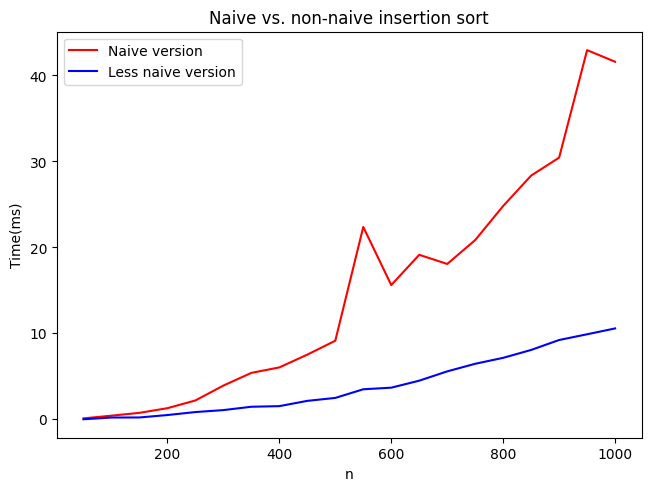

In [16]:
fig = plt.figure(layout='constrained')
plt.plot(nValuesNaive, tValuesNaive, color="red", label="Naive version")
plt.plot(nValues, tValues, color="blue", label="Less naive version")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Naive vs. non-naive insertion sort")

Estude o número de comparações (no pior dos casos) de cada algoritmo para explicar este comportamento.